# Segunda avaliação de TESI
João Carlos B. Santos  
Matheus Barros

# Informações sobre o dataset
#### Título: [Haberman's Survival Data (Dados de Sobrevivência de Haberman)](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)
#### Fontes:
(a) Doador: Tjen-Sien Lim (limt@stat.wisc.edu)  
(b) Data: 4 de março de 1999

#### Uso passado:
1. Haberman, S. J. (1976). Residuais Generalizados para Modelos Log-Lineares, Anais da 9ª Conferência Internacional de Biometria, Boston, pp. 104-122.
2. Landwehr, J. M., Pregibon, D., e Shoemaker, A. C. (1984), Modelos Gráficos para Avaliação de Modelos de Regressão Logística com discussão), Jornal da Associação Estatística Americana 79: 61-83.
3. Lo, W.-D. (1993). Árvores de Regressão Logística, tese de doutorado, Departamento de Estatística, Universidade de Wisconsin, Madison, WI.

#### Informação Relevante:
O conjunto de dados contém casos de um estudo realizado entre **1958** e **1970**, no Hospital Billings, da Universidade de Chicago, sobre a sobrevida de pacientes submetidos à cirurgia para câncer de mama.

#### Número de Instâncias: 306
#### Número de Atributos: 4 (incluindo o atributo de classe)
#### Informações sobre Atributos:
1. Idade do paciente no momento da operação;
2. Ano da cirurgia do paciente (ano - 1900);
3. Número de nós axilares positivos detectados;
4. Status de Sobrevivência (atributo de classe);  
    1 = o paciente sobreviveu 5 anos ou mais;  
    2 = o paciente morreu dentro de 5 anos.

#### Atributos ausentes: Nenhum

### Todos os imports necessários

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from scipy.stats import bayes_mvs, norm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC



### Carregando o csv com os dados e exibindo as 5 primeiras linhas

In [3]:
# df = Data frame
df = pd.read_csv('haberman_csv.csv')
df.head(5)

Age_of_patient_at_time_of_operation  Patients_year_of_operation  \
0                                   30                          64   
1                                   30                          62   
2                                   30                          65   
3                                   31                          59   
4                                   31                          65   

   Number_of_positive_axillary_nodes_detected  Survival_status  
0                                           1                1  
1                                           3                1  
2                                           0                1  
3                                           2                1  
4                                           4                1

### Exibindo as 5 últimas linhas

In [4]:
df.tail(5)

Age_of_patient_at_time_of_operation  Patients_year_of_operation  \
301                                   75                          62   
302                                   76                          67   
303                                   77                          65   
304                                   78                          65   
305                                   83                          58   

     Number_of_positive_axillary_nodes_detected  Survival_status  
301                                           1                1  
302                                           0                1  
303                                           3                1  
304                                           1                2  
305                                           2                2

### Exibindo as informações sobre o dataframe com info() e describe()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age_of_patient_at_time_of_operation           306 non-null int64
Patients_year_of_operation                    306 non-null int64
Number_of_positive_axillary_nodes_detected    306 non-null int64
Survival_status                               306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
df.describe()

Age_of_patient_at_time_of_operation  Patients_year_of_operation  \
count                           306.000000                  306.000000   
mean                             52.457516                   62.852941   
std                              10.803452                    3.249405   
min                              30.000000                   58.000000   
25%                              44.000000                   60.000000   
50%                              52.000000                   63.000000   
75%                              60.750000                   65.750000   
max                              83.000000                   69.000000   

       Number_of_positive_axillary_nodes_detected  Survival_status  
count                                  306.000000       306.000000  
mean                                     4.026144         1.264706  
std                                      7.189654         0.441899  
min                                      0.000000         1.000000  
25%                                      0.000000         1.000000  
50%                                      1.000000         1.000000  
75%                                      4.000000         2.000000  
max                                     52.000000         2.000000

### Exibindo alguns dados referentes a idade dos pacientes (idade menor, maior, média)

In [7]:
# Exibindo a idade dos pacientes na data da cirurgia
df['Age_of_patient_at_time_of_operation']

0      30
1      30
2      30
3      31
4      31
5      33
6      33
7      34
8      34
9      34
10     34
11     34
12     34
13     34
14     35
15     35
16     36
17     36
18     37
19     37
20     37
21     37
22     37
23     37
24     38
25     38
26     38
27     38
28     38
29     38
       ..
276    67
277    67
278    67
279    68
280    68
281    69
282    69
283    69
284    69
285    70
286    70
287    70
288    70
289    70
290    70
291    70
292    71
293    72
294    72
295    72
296    72
297    73
298    73
299    74
300    74
301    75
302    76
303    77
304    78
305    83
Name: Age_of_patient_at_time_of_operation, Length: 306, dtype: int64

In [8]:
# Exibindo todos os valores únicos para a idade dos pacientes
df['Age_of_patient_at_time_of_operation'].unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [9]:
# Exibindo a menor idade
df['Age_of_patient_at_time_of_operation'].min()

30

In [10]:
# Exibindo a maior idade
df['Age_of_patient_at_time_of_operation'].max()

83

In [11]:
# Exibindo a media das idades
df['Age_of_patient_at_time_of_operation'].mean()

52.45751633986928

In [12]:
# Exibindo idades nulas
df[df['Age_of_patient_at_time_of_operation'].isnull()]

Empty DataFrame
Columns: [Age_of_patient_at_time_of_operation, Patients_year_of_operation, Number_of_positive_axillary_nodes_detected, Survival_status]
Index: []

## Procurando valores inconsistentes (Outiliers)

### Idade dos pacientes

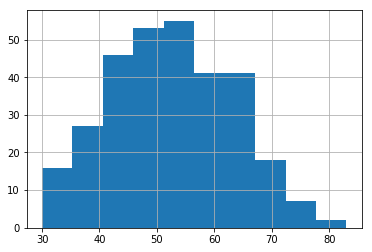

In [13]:
# Histograma das idades dos pacientes
df['Age_of_patient_at_time_of_operation'].hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2fa6dae908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2fa6daef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2fa6dae7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fa6dbb668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fa6dbb9b0>],
 'means': []}

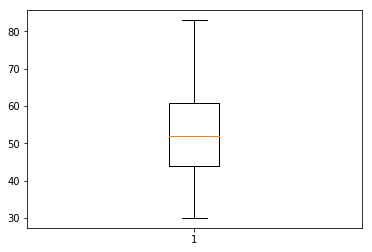

In [14]:
# Média das idades
plt.boxplot(df['Age_of_patient_at_time_of_operation'], showfliers=True)

### Ano da cirurgia (tem que está entre 58 e 70)

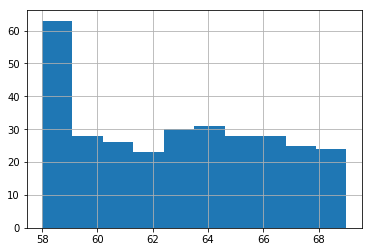

In [17]:
# Histograma dos anos em que foram realizadas as cirgurgias
df['Patients_year_of_operation'].hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2fa6d11710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2fa6d11da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2fa6d115c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2fa6c99470>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2fa6c997b8>],
 'means': []}

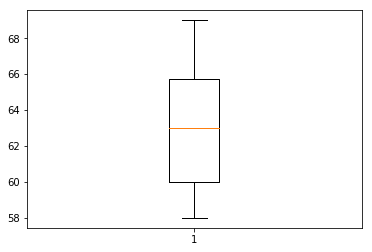

In [18]:
# 
plt.boxplot(df['Patients_year_of_operation'], showfliers=True)

### Exibindo dados referentes ao ano que foi realizada a cirurgia.

In [15]:
# Ano da Primeira cirurgia
df['Patients_year_of_operation'].min()

58

In [16]:
# Ano da última cirurgia
df['Patients_year_of_operation'].max()

69

### Exibindo todas as colunas e buscando valores nulos

In [19]:
# Exibindo todas as colunas existentes
df.columns

Index(['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected', 'Survival_status'],
      dtype='object')

In [20]:
# Procurando por dados nulos nas colunas
for coluna in df.columns:
    print(coluna, 'Nulos: ', df[coluna].isnull().sum())

Age_of_patient_at_time_of_operation Nulos:  0
Patients_year_of_operation Nulos:  0
Number_of_positive_axillary_nodes_detected Nulos:  0
Survival_status Nulos:  0


**Não foi encontrado nenhum valor nulo ou inconsistente.**

### Treinando os dados e avaliando os resultados

In [28]:
# Criando as variáveis x e y para treinamento
# FIXME: Perguntas para avaliarmos os dados:
# O paciente tinha quantos anos na época da cirurgia?
# O paciente que possuia nódulos axililares na época da cirurgia, sobreviveu mais de 5 anos?
# 
x = df[['Age_of_patient_at_time_of_operation', 'Patients_year_of_operation',
       'Number_of_positive_axillary_nodes_detected']]
y = df["Survival_status"]

x = pd.get_dummies(x)

# Treinando os dados
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

# Verificando o tamanho dos dados
print('X:', len(x))
print('Y:', len(y))

X: 306
Y: 306


## Algoritmos de classificação

### Naive bayes Multinomial

In [48]:
modelo_mnb = MultinomialNB()

### AdaBoost

In [49]:
modelo_ada = AdaBoostClassifier()

### Implementando validação cruzada (K-folding)

In [50]:
# Variável k
k = 20

#### Naive Bayes Multinomial k-folding

In [70]:
scores_mnb = cross_val_score(modelo_mnb, x, y, cv=k)
# print('Score MNB: ', scores)

# Taxa de acerto (média)
tx_acerto_mnb = np.mean(scores_mnb)
# print(tx_acerto_ada)
print("Taxa de acerto: {0:.2f}%".format(tx_acerto_ada * 100))
print()

# Desvio padão
desvio_padrao_mnb = scores_mnb.std()
print('Desvio padrão: ', desvio_padrao_mnb)

# Intervalo de confiança
int_conf_mnb = norm.interval(0.95, tx_acerto_mnb, desvio_padrao_mnb)
# print("Intervalo de confiança: ", int_conf_mnb)
print(bayes_mvs(scores_mnb, 0.95))
print("-"*90)

# TODO: Terminar esses testes
media_mnb, variancia_mnb, desvio_mnb = bayes_mvs(scores_mnb, 0.95)
print("Media: ", media_mnb)
print("Variancia: ", variancia_mnb)
print("desvio: ", desvio_mnb)

Taxa de acerto: 68.09%

Desvio padrão:  0.0969314212302327
(Mean(statistic=0.7396446078431371, minmax=(0.6931007904959838, 0.7861884251902904)), Variance(statistic=0.011053765202015065, minmax=(0.005719960392003793, 0.02109848545323894)), Std_dev(statistic=0.1036029453334937, minmax=(0.07563041975292609, 0.14525317708483673)))
------------------------------------------------------------------------------------------
Media:  Mean(statistic=0.7396446078431371, minmax=(0.6931007904959838, 0.7861884251902904))
Variancia:  Variance(statistic=0.011053765202015065, minmax=(0.005719960392003793, 0.02109848545323894))
desvio:  Std_dev(statistic=0.1036029453334937, minmax=(0.07563041975292609, 0.14525317708483673))
